<a href="https://colab.research.google.com/github/raj-027/R-Programs/blob/main/R_assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PCA - Principle Component Analysis

In [3]:
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [4]:
# Load necessary libraries
library(ggplot2)  # For visualization
library(factoextra)  # For enhanced PCA visualization


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
# Use the built-in iris dataset (excluding categorical column)
data <- iris[, -5]  # Removing the Species column



In [5]:
# Applying PCA using prcomp()
pca_result <- prcomp(data, center = TRUE, scale. = TRUE)

# View summary of PCA
summary(pca_result)

# View principal components
print(pca_result)


Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971


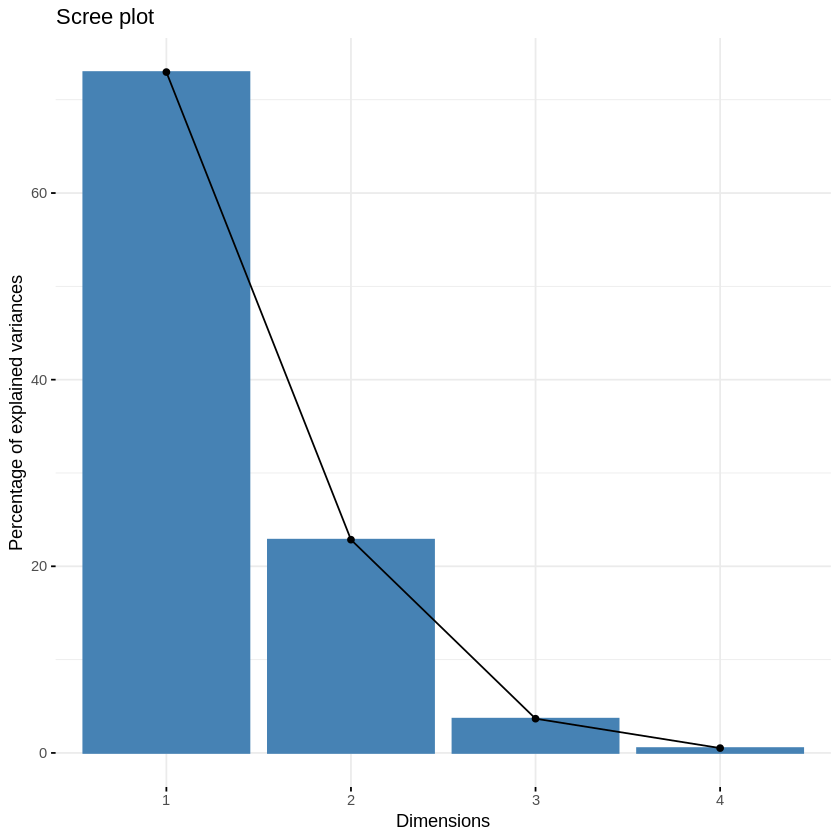

In [7]:
# Scree plot to visualize explained variance
fviz_eig(pca_result)


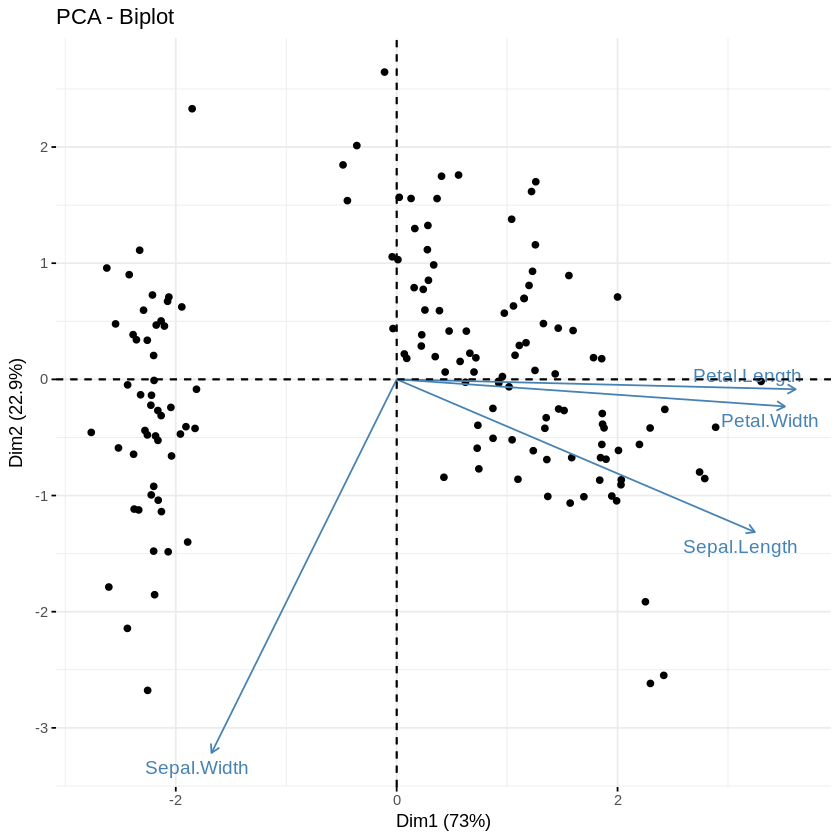

In [8]:
# Biplot of PCA
fviz_pca_biplot(pca_result, label = "var", repel = TRUE)


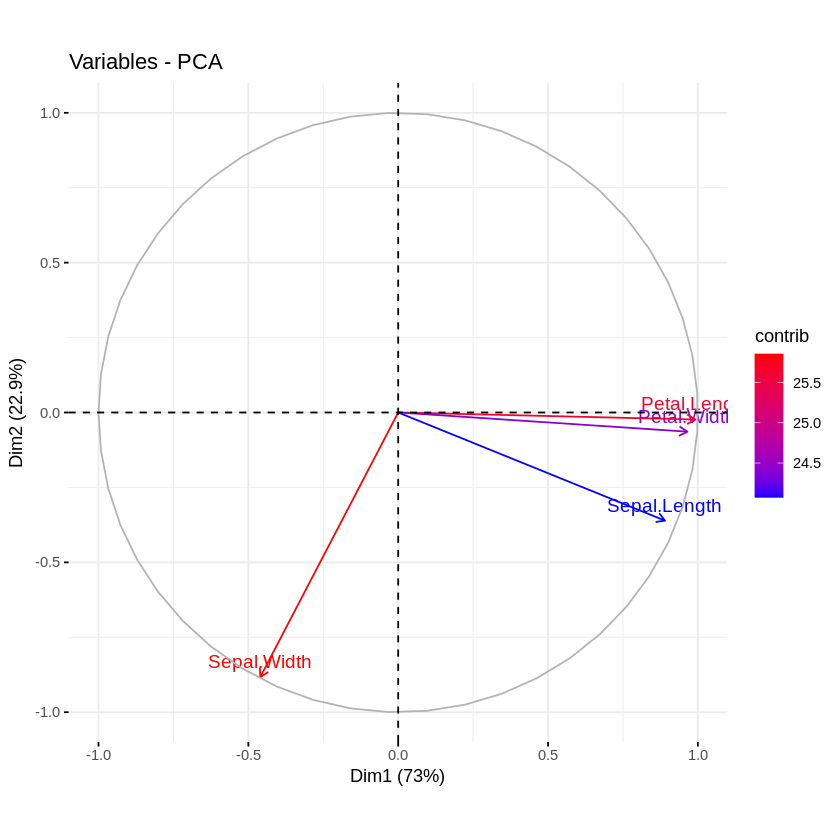

In [9]:
# Contribution of variables to the first two principal components
fviz_pca_var(pca_result, col.var = "contrib", gradient.cols = c("blue", "red"))


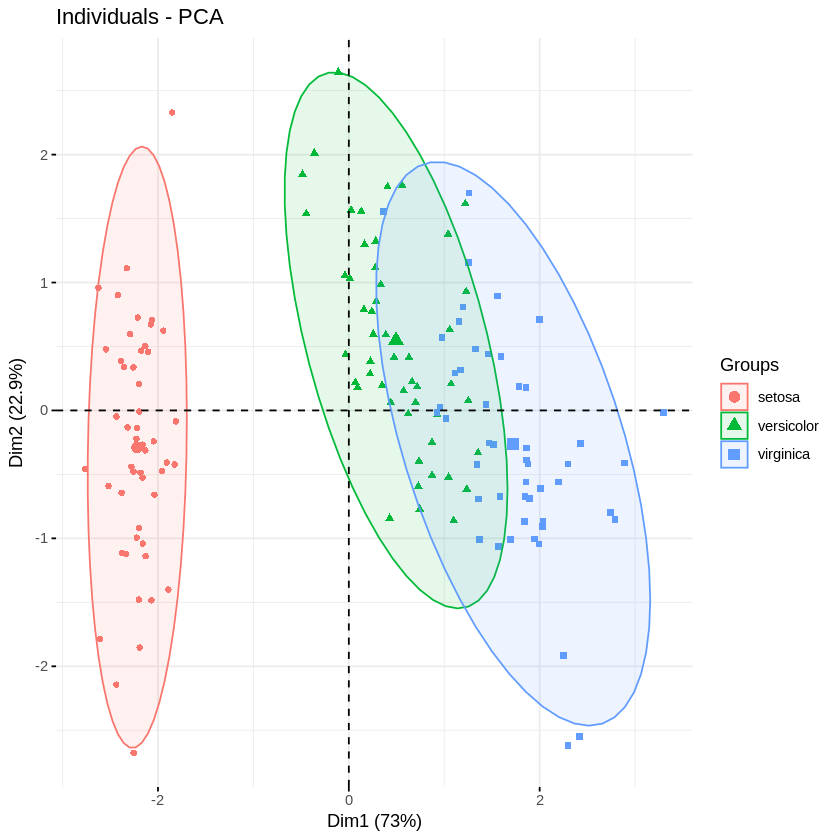

In [10]:
# Individual data points in PCA space
fviz_pca_ind(pca_result, label = "none", habillage = iris$Species, addEllipses = TRUE)


In [11]:
# Get principal component scores
pca_scores <- pca_result$x
head(pca_scores)

# Get loadings (rotation matrix)
pca_result$rotation


PC1,PC2,PC3,PC4
-2.257141,-0.4784238,0.12727962,0.024087508
-2.074013,0.6718827,0.23382552,0.102662845
-2.356335,0.3407664,-0.04405390,0.028282305
-2.291707,0.5953999,-0.09098530,-0.065735340
-2.381863,-0.6446757,-0.01568565,-0.035802870
-2.068701,-1.4842053,-0.02687825,0.006586116


,PC1,PC2,PC3,PC4
Sepal.Length,0.5210659,-0.37741762,0.7195664,0.2612863
Sepal.Width,-0.2693474,-0.92329566,-0.2443818,-0.1235096
Petal.Length,0.5804131,-0.02449161,-0.1421264,-0.8014492
Petal.Width,0.5648565,-0.06694199,-0.6342727,0.5235971


In [12]:
# Choosing number of Principal component
summary(pca_result)$importance[3, ]  # Cumulative variance explained


PC1     PC2     PC3     PC4 
0.72962 0.95813 0.99482 1.00000

In [13]:
# Keep first two principal components
pca_transformed_data <- as.data.frame(pca_scores[, 1:2])
pca_transformed_data$Species <- iris$Species  # Add species info
head(pca_transformed_data)


,PC1,PC2,Species
,<dbl>,<dbl>,<fct>
1,-2.257141,-0.4784238,setosa
2,-2.074013,0.6718827,setosa
3,-2.356335,0.3407664,setosa
4,-2.291707,0.5953999,setosa
5,-2.381863,-0.6446757,setosa
6,-2.068701,-1.4842053,setosa


In [14]:
# Compute eigenvalues manually
cov_matrix <- cov(scale(data))  # Compute covariance matrix of standardized data
eigen_result <- eigen(cov_matrix)  # Get eigenvalues and eigenvectors

# Eigenvalues
eigen_result$values

# Eigenvectors (principal component loadings)
eigen_result$vectors


[1] 2.91849782 0.91403047 0.14675688 0.02071484

0.5210659,-0.37741762,0.7195664,0.2612863
-0.2693474,-0.92329566,-0.2443818,-0.1235096
0.5804131,-0.02449161,-0.1421264,-0.8014492
0.5648565,-0.06694199,-0.6342727,0.5235971


In [15]:
# Compute proportion of variance explained by each component
pve <- eigen_result$values / sum(eigen_result$values)

# Cumulative variance explained
cumulative_pve <- cumsum(pve)

# Print results
pve
cumulative_pve


[1] 0.729624454 0.228507618 0.036689219 0.005178709

[1] 0.7296245 0.9581321 0.9948213 1.0000000

In [17]:
# Standardize data
data_scaled <- scale(data)

# Compute SVD
svd_result <- svd(data_scaled)

# Compute PCA scores using SVD
svd_scores <- svd_result$u %*% diag(svd_result$d)

# Make sure both have the same sign (prcomp may flip signs arbitrarily)
signs <- sign(colMeans(pca_result$x) / colMeans(svd_scores))
svd_scores <- svd_scores * signs

# Compare with prcomp() results
all.equal(svd_scores, pca_result$x)



[1] "Attributes: < Length mismatch: comparison on first 1 components >"
[2] "Mean relative difference: 0.5127316"